# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку square, равную width*height или perimeter Некорректно будет придумать колонку width2, равную width*2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
 [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 случайных точек, расположите их на оси абсцисс

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

# Предобработка

In [1]:
import pandas as pd
import numpy as np
from copy import copy

## Reading csv

In [2]:
original_ds = pd.read_csv('content/SpotifyFeatures.csv')
ds = copy(original_ds)
original_ds.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


## Null replacement

In [3]:
ds.isnull().sum().sum()

0

In [4]:
ds.isna().any()

genre               False
artist_name         False
track_name          False
track_id            False
popularity          False
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
dtype: bool

In [5]:
idx = ds[ds.isna().any(axis=1)].index

In [7]:
ds = ds.drop(index=idx)
ds.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [8]:
ds.isna().any()

genre               False
artist_name         False
track_name          False
track_id            False
popularity          False
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
dtype: bool

## Some data action

### Add new column

In [9]:
# Add column with song length 
ds['track_name_len'] = [len(str(s).split()) for s in ds['track_name']]
ds.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_name_len
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,6
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,5
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,6
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,4
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1


### Remove data

In [10]:
ds = ds.drop(labels=['instrumentalness', 'genre'], axis=1)
ds.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_name_len
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,6
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,5
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,6
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,4
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1


### Replace data

In [11]:
ds['duration_ms'] = ds['duration_ms'].apply(lambda x : x / 10000)
ds = ds.rename(columns={'duration_ms': 'duration_seconds'})
ds.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_seconds,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_name_len
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,9.9373,0.910,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,6
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,13.7373,0.737,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,5
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,17.0267,0.131,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,6
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,15.2427,0.326,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,4
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,8.2625,0.225,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1


In [12]:
ds.loc[ds['mode'] == 'Major', 'mode'] = 0
ds.loc[ds['mode'] == 'Minor', 'mode'] = 1
ds.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_seconds,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_name_len
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,9.9373,0.910,C#,0.3460,-1.828,0,0.0525,166.969,4/4,0.814,6
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,13.7373,0.737,F#,0.1510,-5.559,1,0.0868,174.003,4/4,0.816,5
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,17.0267,0.131,C,0.1030,-13.879,1,0.0362,99.488,5/4,0.368,6
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,15.2427,0.326,C#,0.0985,-12.178,0,0.0395,171.758,4/4,0.227,4
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,8.2625,0.225,F,0.2020,-21.150,0,0.0456,140.576,4/4,0.390,1


In [13]:
key_order = {k : v for v, k in enumerate(ds['key'].unique())}
ds['key'] = ds['key'].apply(lambda x : key_order[x])
ds.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_seconds,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_name_len
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,9.9373,0.910,0,0.3460,-1.828,0,0.0525,166.969,4/4,0.814,6
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,13.7373,0.737,1,0.1510,-5.559,1,0.0868,174.003,4/4,0.816,5
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,17.0267,0.131,2,0.1030,-13.879,1,0.0362,99.488,5/4,0.368,6
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,15.2427,0.326,0,0.0985,-12.178,0,0.0395,171.758,4/4,0.227,4
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,8.2625,0.225,3,0.2020,-21.150,0,0.0456,140.576,4/4,0.390,1


In [14]:
sig_order = {k : v for v, k in enumerate(ds['time_signature'].unique())}
ds['time_signature'] = ds['time_signature'].apply(lambda x : sig_order[x])
ds.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_seconds,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_name_len
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,9.9373,0.910,0,0.3460,-1.828,0,0.0525,166.969,0,0.814,6
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,13.7373,0.737,1,0.1510,-5.559,1,0.0868,174.003,0,0.816,5
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,17.0267,0.131,2,0.1030,-13.879,1,0.0362,99.488,1,0.368,6
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,15.2427,0.326,0,0.0985,-12.178,0,0.0395,171.758,0,0.227,4
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,8.2625,0.225,3,0.2020,-21.150,0,0.0456,140.576,0,0.390,1


## Save

In [15]:
ds.to_csv('/content/sample_data/UpdatedFeatures.csv')

## Plots, etc.

In [16]:
import matplotlib.pyplot as plt

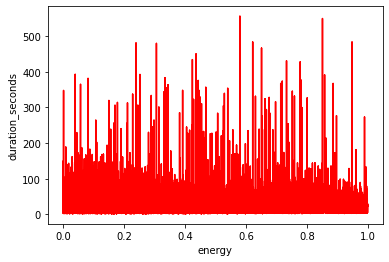

In [18]:
ds = ds.sort_values(by=['energy'])

plt.plot(ds['energy'], ds['duration_seconds'], 'r')
plt.xlabel('energy')
plt.ylabel('duration_seconds')
plt.show()

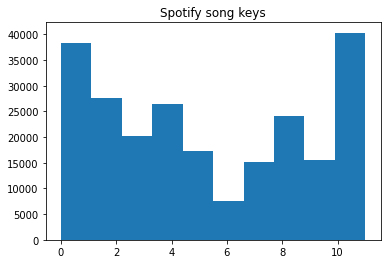

In [19]:
plt.hist(ds.key)
plt.title('Spotify song keys')
plt.show()

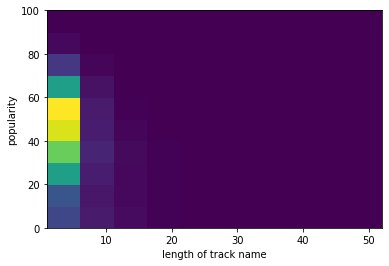

In [20]:
plt.hist2d(ds.track_name_len, ds.popularity)
plt.xlabel('length of track name')
plt.ylabel('popularity')
plt.show()

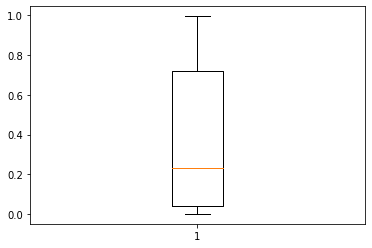

In [21]:
plt.boxplot(ds.acousticness)
plt.show()

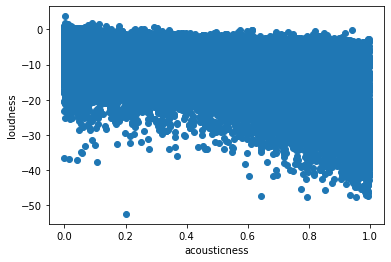

In [22]:
plt.scatter(ds.acousticness, ds.loudness)
plt.xlabel('acousticness')
plt.ylabel('loudness')
plt.show()

# Интерполяция

In [23]:
import random
from scipy import interpolate as interp

Implemented formula from [this document](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf)

[Krogh interpolation](https://github.com/scipy/scipy/blob/v1.7.1/scipy/interpolate/polyint.py#L358-L421)

[Original article](https://www.ams.org/journals/mcom/1970-24-109/S0025-5718-1970-0258240-X/S0025-5718-1970-0258240-X.pdf)

In [24]:
def barycentric_interpolate(xi, yi, x):
  w = []
  for i, x_i in enumerate(xi):
    cur = 1
    for j, x_j in enumerate(xi):
      if i == j:
        continue
      cur *= (1 / (x_i - x_j))
    w.append(cur)
  y = []
  for k in x:
    a = sum(y_j * w_j / (k - x_j) for x_j, y_j, w_j in zip(xi, yi, w))
    b = sum(w_j / (k - x_j) for x_j, w_j in zip(xi, w))
    y.append(a / b)
  return y

In [25]:
N_POINTS = 20
xi = [random.random() for _ in range(N_POINTS)]
xi.sort()
yi = [random.random() for _ in range(N_POINTS)]

x = [random.random() for _ in range(N_POINTS)]
x.sort()

scipy_y = interp.krogh_interpolate(xi, yi, x)
my_y = barycentric_interpolate(xi, yi, x)

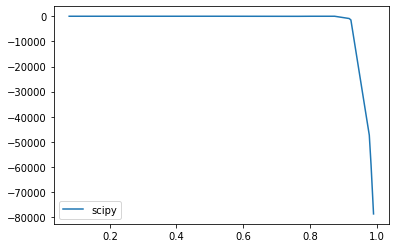

In [26]:
plt.plot(x, scipy_y, label='scipy')
plt.legend()
plt.show()

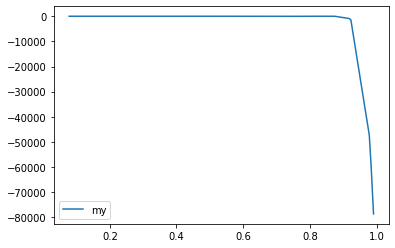

In [27]:
plt.plot(x, my_y, label='my')
plt.legend()
plt.show()

# Быстрая гистограмма

In [28]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    array.sort()
    l, r = array[0], array[-1]
    eps = (r - l) / (bins)
    labels = np.arange(l, r, eps)
    regions = [0 for _ in range(bins)]
    r_ptr = 0
    for bin in range(bins):
      next_bin_label = labels[bin + 1] if bin + 1 < bins else labels[bin] + 1000
      while r_ptr < len(array) and array[r_ptr] < next_bin_label:
        regions[bin] += 1
        r_ptr += 1

    return (regions, labels.tolist()), [eps] * bins

In [29]:
import timeit 
N_EXECUTIONS = 1
def measure_time(f, *args):
  return timeit.timeit(lambda: f(*args), number=N_EXECUTIONS)

0.05205623700021533 0.02805867200004286


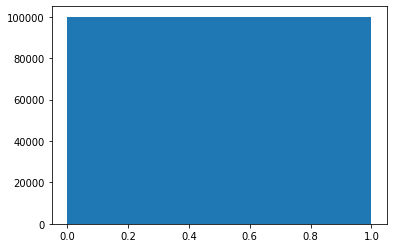

In [32]:
N_ELEMENTS = 100000
arr = [random.random() for _ in range(N_ELEMENTS)]
my_time = measure_time(fast_hist, arr, 1)
plt_time = measure_time(plt.hist, arr, 1)
print(my_time, plt_time)

In [33]:
array = [random.random() for _ in range(10)]
bins = random.randint(2, 10)
print(array)
print(bins)

[0.038866814487070966, 0.4743782544529084, 0.6092281358084373, 0.6253809301773733, 0.9010114293684834, 0.31577694675205736, 0.7379725117827256, 0.484079061119449, 0.6138974758820381, 0.08986213718125591]
3


(([3, 3, 4], [0.038866814487070966, 0.3262483527808751, 0.6136298910746792]), [0.28738153829380414, 0.28738153829380414, 0.28738153829380414])


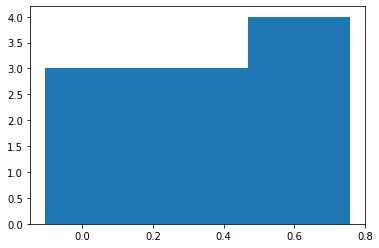

In [34]:
(height, labels), width = fast_hist(array, bins)
plt.bar(labels, height, width)
print(fast_hist(array, bins))
plt.show()

(array([3., 3., 4.]),
 array([0.03886681, 0.32624835, 0.61362989, 0.90101143]),
 <a list of 3 Patch objects>)

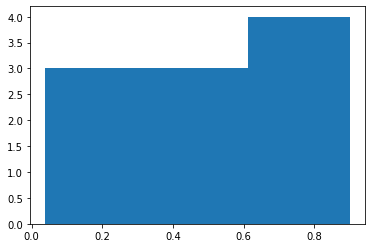

In [35]:
plt.hist(array, bins)